In [6]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import tensorflow as tf
from tensorflow import keras

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Load the training and testing data minst data set is already presnt in keras 

In [103]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [104]:
x_train[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [105]:
len(x_train)

60000

In [106]:
len(y_train)

60000

In [107]:
len(x_test)

10000

In [108]:
len(y_test)

10000

In [109]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [110]:
x_train.shape

(60000, 28, 28)

In [111]:
y_train.shape

(60000,)

In [112]:

# first image 
# x_train[0] 

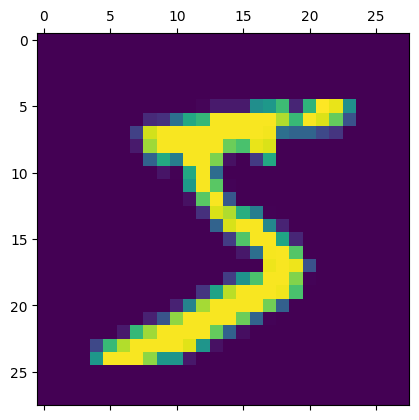

In [113]:
plt.matshow(x_train[0]) 
# first input in image form 

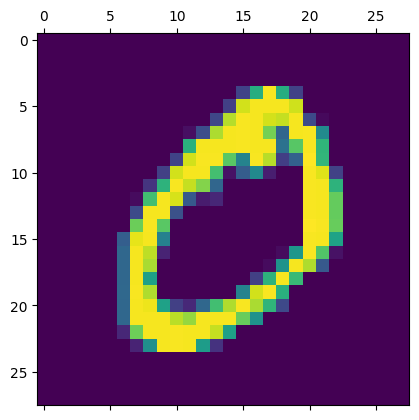

In [114]:
plt.matshow(x_train[1]) 

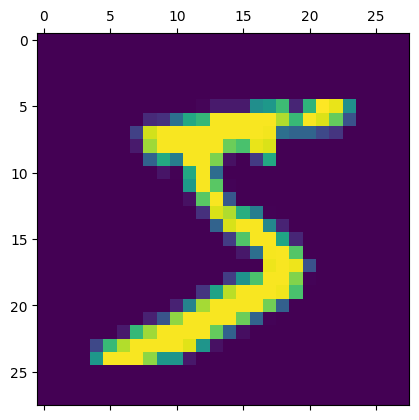

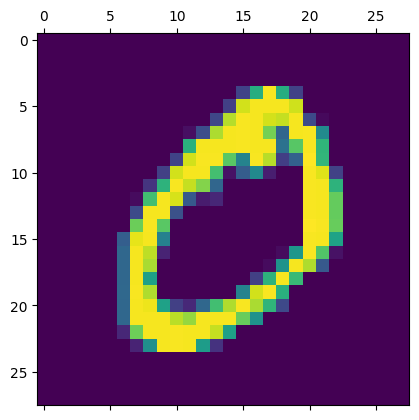

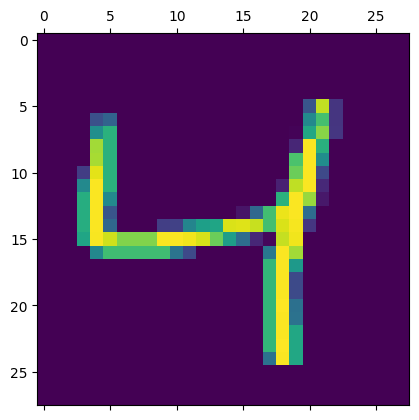

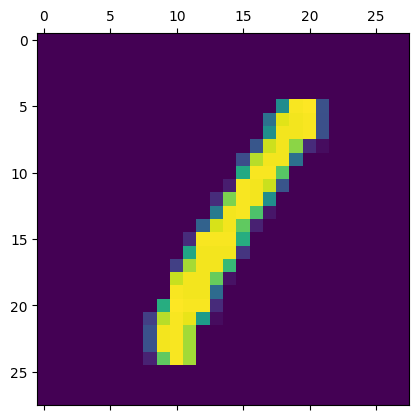

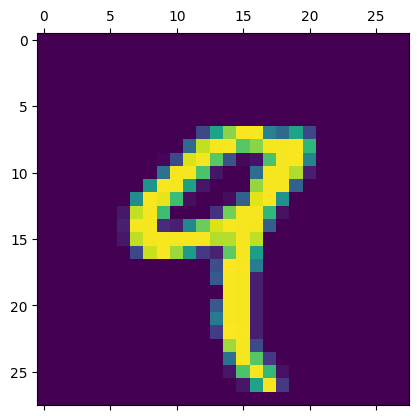

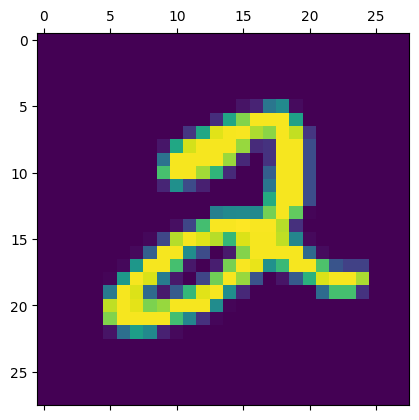

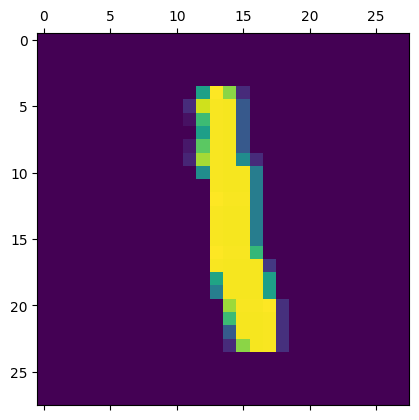

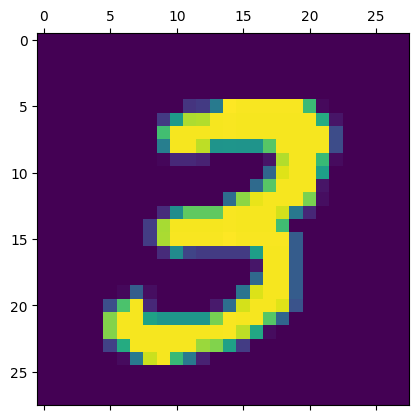

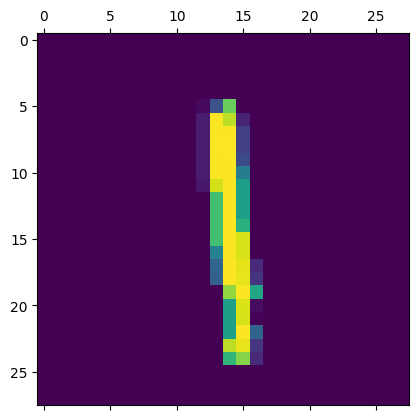

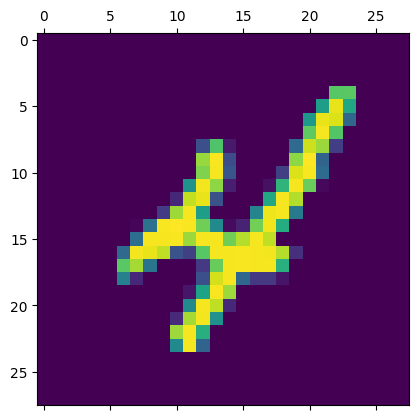

In [115]:
# printing all the images 
num_classes = 10
for i in range (0,num_classes): 
    plt.matshow(x_train[i]) 
    

In [116]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [117]:



from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [118]:

# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0


In [119]:

# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


In [120]:
# model building : sequential model 

In [121]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [122]:

model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))

In [123]:
# Training the model using SGD
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [124]:
# Train the model using SGD with 11 epochs

batch_size = 512
epochs = 11 # As per the problem statement
# epochs = 100

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/11
118/118 [==============================] - 1s 8ms/step - loss: 0.9366 - accuracy: 0.7294
Epoch 2/11
118/118 [==============================] - 1s 9ms/step - loss: 0.4251 - accuracy: 0.8763
Epoch 3/11
118/118 [==============================] - 1s 9ms/step - loss: 0.3406 - accuracy: 0.9020
Epoch 4/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2983 - accuracy: 0.9130
Epoch 5/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2667 - accuracy: 0.9221
Epoch 6/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2450 - accuracy: 0.9296
Epoch 7/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2273 - accuracy: 0.9342
Epoch 8/11
118/118 [==============================] - 1s 9ms/step - loss: 0.2111 - accuracy: 0.9377
Epoch 9/11
118/118 [==============================] - 1s 9ms/step - loss: 0.1971 - accuracy: 0.9435
Epoch 10/11
118/118 [==============================] - 1s 9ms/step - loss: 0.1847 - accuracy: 0.9449

In [125]:
# Evaluate the network

test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1449 - accuracy: 0.9564


In [126]:
test_loss

0.1449333131313324

In [127]:
test_acc

0.9563999772071838

In [128]:

# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


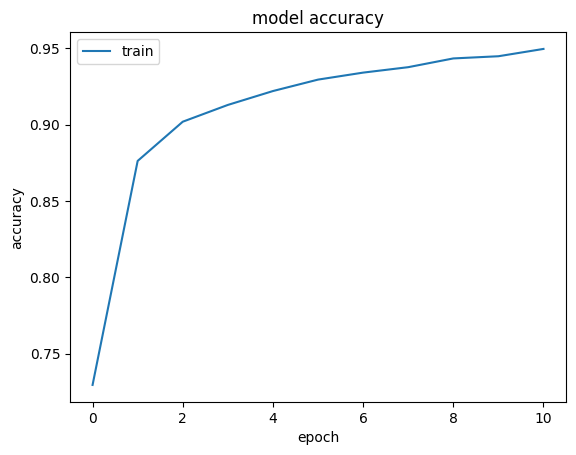

In [132]:
# Plot the training loss and accuracy

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

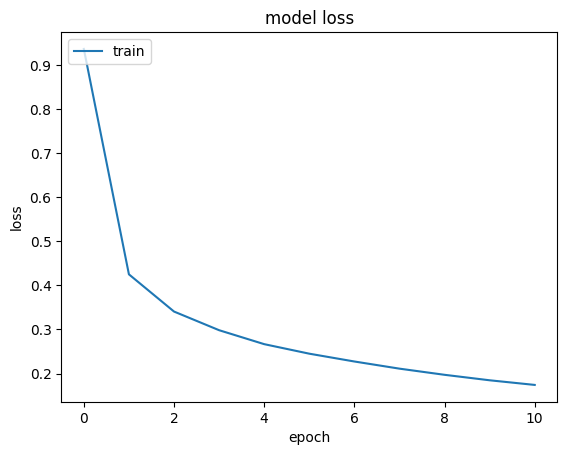

In [133]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()